In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/soil-types/Soil Types/Laterite soil/laterite 22.png
/kaggle/input/soil-types/Soil Types/Laterite soil/laterite 28.png
/kaggle/input/soil-types/Soil Types/Laterite soil/laterite 20.png
/kaggle/input/soil-types/Soil Types/Laterite soil/laterite 11.png
/kaggle/input/soil-types/Soil Types/Laterite soil/laterite 16.png
/kaggle/input/soil-types/Soil Types/Laterite soil/laterite 26.png
/kaggle/input/soil-types/Soil Types/Laterite soil/laterite 8.png
/kaggle/input/soil-types/Soil Types/Laterite soil/laterite 25.png
/kaggle/input/soil-types/Soil Types/Laterite soil/laterite 6.png
/kaggle/input/soil-types/Soil Types/Laterite soil/laterite 19.png
/kaggle/input/soil-types/Soil Types/Laterite soil/laterite 10.png
/kaggle/input/soil-types/Soil Types/Laterite soil/laterite 9.png
/kaggle/input/soil-types/Soil Types/Laterite soil/laterite 18.png
/kaggle/input/soil-types/Soil Types/Laterite soil/laterite 3.png
/kaggle/input/soil-types/Soil Types/Laterite soil/laterite 27.png
/kaggle/input/

In [2]:
main_folder = '/kaggle/input/soil-types/Soil Types'

In [3]:
import os
import pandas as pd
from skimage.feature import hog
from skimage import io, color
import numpy as np

# Function to extract HOG features
def extract_hog_features(image):
    # Discard alpha channel if present
    if image.shape[-1] == 4:
        image = image[..., :3]

    # Convert image to grayscale
    image_gray = color.rgb2gray(image)
    
    # Extract HOG features
    features, hog_image = hog(image_gray, orientations=8, pixels_per_cell=(16, 16),
                              cells_per_block=(1, 1), visualize=True, block_norm='L2-Hys')
    
    return features

# Main folder containing subfolders of images
#main_folder = '/path/to/your/main/folder'

# List to store all HOG features and corresponding labels
all_hog_features = []
image_labels = []

# Get the maximum length of HOG feature vectors
max_length = 0

# Iterate through subfolders
for folder in os.listdir(main_folder):
    subfolder = os.path.join(main_folder, folder)
    if os.path.isdir(subfolder):
        # Iterate through images in subfolder
        for image_file in os.listdir(subfolder):
            image_path = os.path.join(subfolder, image_file)
            if os.path.isfile(image_path):
                # Load image
                image = io.imread(image_path)
                
                # Extract HOG features
                hog_features = extract_hog_features(image)
                all_hog_features.append(hog_features)
                
                # Append label (subfolder name) for the image
                image_labels.append(folder)
                
                # Update maximum length of HOG feature vectors
                max_length = max(max_length, len(hog_features))

# Pad shorter feature vectors with zeros to make them consistent
for i in range(len(all_hog_features)):
    hog_features = all_hog_features[i]
    if len(hog_features) < max_length:
        padded_features = np.pad(hog_features, (0, max_length - len(hog_features)))
        all_hog_features[i] = padded_features

# Convert the list of feature arrays into a numpy array
all_hog_features = np.array(all_hog_features)

# Calculate the average magnitude of each HOG feature across all images
average_magnitude = np.mean(all_hog_features, axis=0)

# Select the top N HOG features based on their average magnitude across all images
top_indices = np.argsort(average_magnitude)[::-1][:10]

# Extract the selected top N HOG features for all images
selected_hog_features = all_hog_features[:, top_indices]

# Create a dataframe with the selected top N HOG features and image labels
df = pd.DataFrame(data=selected_hog_features, columns=[f'hog_feature_{i}' for i in range(10)])
df['label'] = image_labels  # Add image labels


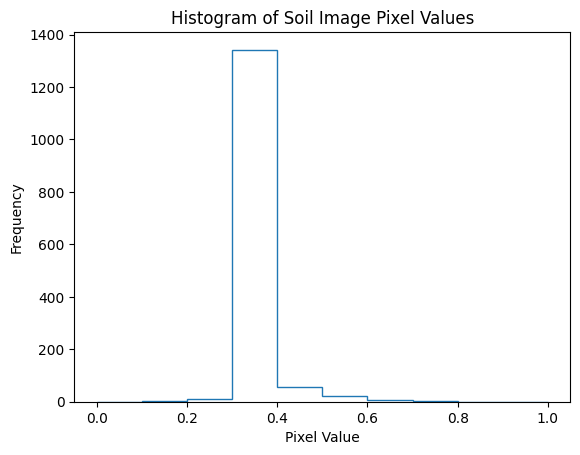

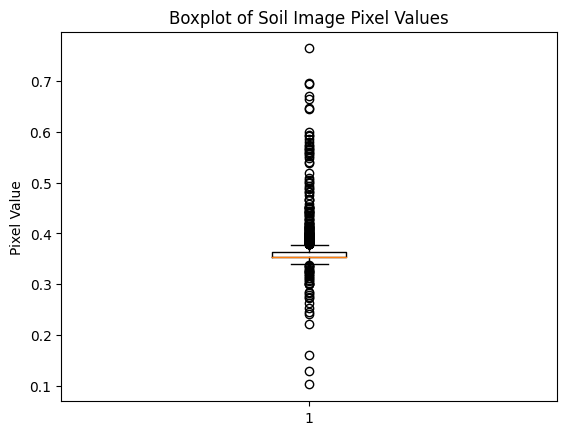

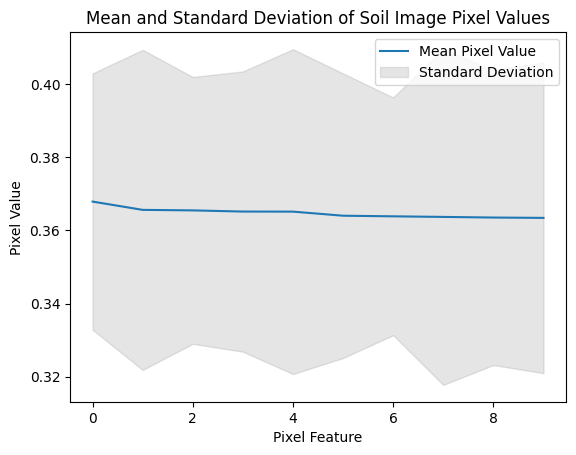

Minimum Pixel Value: 0.10228615538007554
Maximum Pixel Value: 0.7646664076071811
Mean Pixel Value: 0.36475913511330066
Median Pixel Value: 0.35355339053803103
Standard Deviation of Pixel Values: 0.04003029896988402


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing pixel values of soil images

# Extracting pixel values from the DataFrame
pixel_values = df[['hog_feature_0','hog_feature_1','hog_feature_2','hog_feature_3','hog_feature_4','hog_feature_5','hog_feature_6','hog_feature_7','hog_feature_8','hog_feature_9']]

# Convert DataFrame to numpy array
soil_image_data = pixel_values.values.astype(float)

# Calculate basic statistics of pixel values
min_value = np.min(soil_image_data)
max_value = np.max(soil_image_data)
mean_value = np.mean(soil_image_data)
median_value = np.median(soil_image_data)
std_deviation = np.std(soil_image_data)

# Plot histogram of pixel values
plt.hist(soil_image_data.ravel(), bins=10, range=(0, 1), histtype='step')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Soil Image Pixel Values')
plt.show()

plt.boxplot(soil_image_data.ravel())
plt.ylabel('Pixel Value')
plt.title('Boxplot of Soil Image Pixel Values')
plt.show()

plt.plot(np.mean(soil_image_data, axis=0), label='Mean Pixel Value')
plt.fill_between(range(len(pixel_values.columns)), np.mean(soil_image_data, axis=0) - np.std(soil_image_data, axis=0), np.mean(soil_image_data, axis=0) + np.std(soil_image_data, axis=0), color='gray', alpha=0.2, label='Standard Deviation')
plt.xlabel('Pixel Feature')
plt.ylabel('Pixel Value')
plt.title('Mean and Standard Deviation of Soil Image Pixel Values')
plt.legend()
plt.show()
# Display basic statistics
print("Minimum Pixel Value:", min_value)
print("Maximum Pixel Value:", max_value)
print("Mean Pixel Value:", mean_value)
print("Median Pixel Value:", median_value)
print("Standard Deviation of Pixel Values:", std_deviation)


In [13]:
df.head(50)

,hog_feature_0,hog_feature_1,hog_feature_2,hog_feature_3,hog_feature_4,hog_feature_5,hog_feature_6,hog_feature_7,hog_feature_8,hog_feature_9,label
0,0.386465,0.353553,0.377334,0.253741,0.359972,0.355948,0.356242,0.355576,0.373856,0.380034,Laterite soil
1,0.360709,0.371584,0.365418,0.353553,0.355501,0.365770,0.360635,0.363314,0.353553,0.354181,Laterite soil
2,0.371906,0.360689,0.353553,0.354259,0.362564,0.353553,0.353553,0.353553,0.362819,0.364634,Laterite soil
3,0.353553,0.353553,0.364424,0.353553,0.354252,0.356772,0.387979,0.360326,0.354027,0.353553,Laterite soil
4,0.375964,0.362986,0.353553,0.378557,0.353553,0.353553,0.308063,0.371288,0.353553,0.353553,Laterite soil
5,0.539107,0.353553,0.428806,0.357025,0.585431,0.386950,0.421393,0.365332,0.353553,0.370821,Laterite soil
6,0.367163,0.355696,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.357568,Laterite soil
7,0.402663,0.353553,0.353553,0.353553,0.498615,0.370331,0.506102,0.353553,0.353553,0.353553,Laterite soil
8,0.354517,0.353553,0.354630,0.354045,0.353553,0.353553,0.359608,0.357884,0.353553,0.353553,Laterite soil
9,0.426809,0.363444,0.353981,0.353553,0.355127,0.458330,0.383533,0.353553,0.361362,0.362400,Laterite soil


In [14]:
csv_file_path = '/kaggle/working/soil_types_hog_features2.csv'
df.to_csv(csv_file_path, index=False)